##ASSIGNMENT
#Dataset
Assume you are a scientist who is trying to make a propellent and is trying many tests to make an efficient propellent .
<br>
You have performed two tests.
<br>
From the two tests you would like whether this propellent works efficiently or not.
Build your own logistic regression model to decide .
<br>
Text with "DO NOT EDIT THIS CODE" needs to be only run do not edit it


In [34]:
#import libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import math

In [35]:
#load data
data=np.loadtxt("data1.txt", delimiter=',')
X=data[:,:2]
y=data[:,2]
X_train=X
y_train=y

In [36]:
#plot data to visualise
def plot_data(X,y,positive_label="y=1", negative_label="y=0"):
#positive_label and negative_label refers to classes of y as y can be 0 or 1
    positive = y == 1
    negative = y == 0
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=positive_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=negative_label)
#While plotting graph the label parameter will be either positive_label or negative_label so plot both the labels for

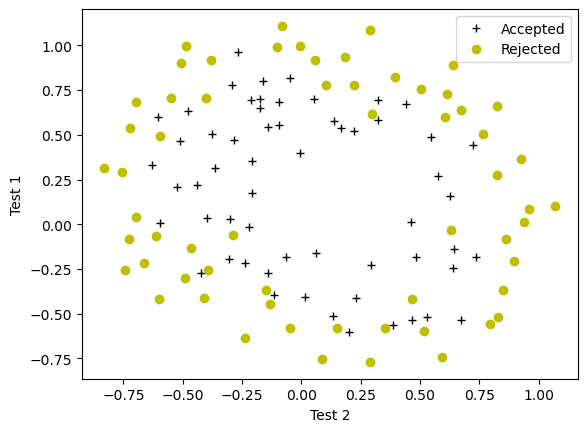

In [37]:
#test
plot_data(X_train, y_train[:], positive_label="Accepted", negative_label="Rejected")
plt.xlabel('Test 2')
plt.ylabel('Test 1')
plt.legend(loc="upper right")
plt.show()

In [38]:
#feature mapping
def map_feature(X1,X2):
    X1=np.atleast_1d(X1)
    X2=np.atleast_1d(X2)
    degree=6
    out=[]
    for i in range(1,degree+1):
        for j in range(i+1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [39]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)
# mapped_X

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


In [40]:
#sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [41]:
# @title DO NOT EDIT THIS CODE
def sigmoid_test(target):
    assert np.isclose(target(3.0), 0.9525741268224334), "Failed for scalar input"
    assert np.allclose(target(np.array([2.5, 0])), [0.92414182, 0.5]), "Failed for 1D array"
    assert np.allclose(target(np.array([[2.5, -2.5], [0, 1]])),
                       [[0.92414182, 0.07585818], [0.5, 0.73105858]]), "Failed for 2D array"
    print('\033[92mTests passed!')
    
sigmoid_test(sigmoid)

Tests passed!


In [43]:
# @title DO NOT EDIT THIS CODE
def compute_cost_test(target):
    X = np.array([[0, 0, 0, 0]]).T
    y = np.array([0, 0, 0, 0])
    w = np.array([0])
    b = 1
    result = target(X, y, w, b)
    if math.isinf(result):
        raise ValueError("Did you get the sigmoid of z_wb?")

    np.random.seed(17)
    X = np.random.randn(5, 2)
    y = np.array([1, 0, 0, 1, 1])
    w = np.random.randn(2)
    b = 0
    result = target(X, y, w, b)
    assert np.isclose(result, 2.15510667), f"Wrong output. Expected: {2.15510667} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 1, 0, 0])
    w = np.random.randn(3)
    b = 0

    result = target(X, y, w, b)
    assert np.isclose(result, 0.80709376), f"Wrong output. Expected: {0.80709376} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 0,1, 0])
    w = np.random.randn(3)
    b = 3
    result = target(X, y, w, b)
    assert np.isclose(result, 0.4529660647), f"Wrong output. Expected: {0.4529660647} got: {result}. Did you inizialized z_wb = b?"

    print('\033[92mTests passed!')

In [44]:
#computing cost
def compute_cost(X,y,w,b,lambda_=1):
#write your code
    m = X.shape[0]
    z_wb = np.dot(X, w) + b
    f_wb = sigmoid(z_wb)
    cost = -1/m * (np.dot(y, np.log(f_wb)) + np.dot(1-y, np.log(1-f_wb)))
    total_cost = np.mean(cost)
    return total_cost

In [45]:
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))

# test
compute_cost_test(compute_cost)

Cost at test w,b: 11.777
Tests passed!


In [46]:
#compute regularised cost
def compute_cost_reg(X, y, w, b, lambda_ = 1):
#write your code
    m = X.shape[0]
    z_wb = np.dot(X, w) + b
    f_wb = sigmoid(z_wb)
    cost = -1/m * (np.dot(y, np.log(f_wb)) + np.dot(1-y, np.log(1-f_wb)))
    reg_cost = (lambda_ / (2 * m)) * np.sum(np.square(w))
    total_cost = np.mean(cost) + reg_cost
    return total_cost

In [47]:
# @title DO NOT EDIT THIS CODE
def compute_cost_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(3)
    b = 0.4
    X = np.random.randn(6, 3)
    y = np.array([0, 1, 1, 0, 1, 1])
    lambda_ = 0.1
    expected_output = target(X, y, w, b, lambda_)

    assert np.isclose(expected_output, 0.5469746792761936), f"Wrong output. Expected: {0.5469746792761936} got:{expected_output}"

    w = np.random.randn(5)
    b = -0.6
    X = np.random.randn(8, 5)
    y = np.array([1, 0, 1, 0, 0, 1, 0, 1])
    lambda_ = 0.01
    output = target(X, y, w, b, lambda_)
    assert np.isclose(output, 1.2608591964119995), f"Wrong output. Expected: {1.2608591964119995} got:{output}"

    w = np.array([2, 2, 2, 2, 2])
    b = 0
    X = np.zeros((8, 5))
    y = np.array([0.5] * 8)
    lambda_ = 3
    output = target(X, y, w, b, lambda_)
    expected = -np.log(0.5) + 3. / (2. * 8.) * 20.
    assert np.isclose(output, expected), f"Wrong output. Expected: {expected} got:{output}"

    print('\033[92mAll tests passed!')

In [33]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularised cost :", cost)

#test
compute_cost_reg_test(compute_cost_reg)

Regularised cost : 0.6618252552483949
All tests passed!
